In [1]:
import PIL
from PIL import Image

image = Image.open('dogs.jpeg')



In [2]:
from numpy import asarray


dogs = asarray(image)

data = dogs / 255.0 # use 0...1 scale

print(data.shape)


(185, 272, 3)


In [3]:
from sklearn.decomposition import PCA


data_reshape = data.reshape(185 * 272, 3)
pca = PCA(n_components=2)

# prepare transform on dataset
pca.fit(data_reshape)

# apply transform to dataset
transformed_data = pca.transform(data_reshape)

print(transformed_data.shape)
print(data_reshape.shape)

(50320, 2)
(50320, 3)


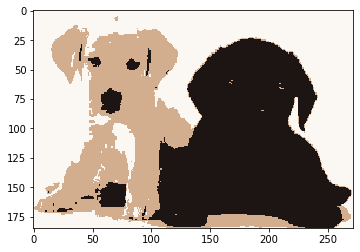

In [4]:
from sklearn.cluster import KMeans

import  matplotlib.pyplot as plt

kmeans = KMeans(3)


kmeans.fit(data_reshape)

labels = kmeans.predict(data_reshape)

new_colors = kmeans.cluster_centers_[labels]

dogs_recolored = new_colors.reshape(data.shape)


plt.imshow(dogs_recolored)


In [5]:
centroids = kmeans.cluster_centers_
print(centroids * 255)

[[210.63855422 174.83861979 143.72395705]
 [ 29.51503718  21.58366142  20.47599519]
 [251.48731784 247.68503858 243.16040543]]



## Task 2 Supervised Learning -SVM -Week 9 content!


In [6]:
import pandas as pd


Collegedf = pd.read_csv('College.csv')

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


le.fit(Collegedf['Private'])

Y = le.transform(Collegedf['Private'])


In [8]:
from sklearn.model_selection import train_test_split

CollegedfTrain , CollegedfTest, YTrain, YTest = train_test_split(Collegedf, Y, test_size=.20)

# print(CollegedfTrain)
XTrain = CollegedfTrain[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']]

XTest = CollegedfTest[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']]




In [9]:
from sklearn import svm, metrics 

# random state 0 so result is same every time we runt this
lin_clf = svm.LinearSVC(random_state=0);
lin_clf.fit(XTrain, YTrain)

predicted = lin_clf.predict(XTest)

accuracyScore = metrics.accuracy_score(YTest, predicted)
print(accuracyScore)

0.9423076923076923


/Users/kanavarora/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


clf = make_pipeline(StandardScaler(), lin_clf)

clf.fit(XTrain, YTrain)
predictedPipeline = clf.predict(XTest)

accuracyScorePipeline = metrics.accuracy_score(YTest, predicted)

print(accuracyScorePipeline)

0.9423076923076923


/Users/kanavarora/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
#Function to print best hyperparamaters: 
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


param_grid_svr = dict(kernel=[ 'rbf', 'poly'],
                     degree=[2],
                     C=[600, 700, 800, 900])


svr = GridSearchCV(SVC(), param_grid=param_grid_svr, cv=5, verbose=3)


#fit model
svr = svr.fit(XTrain,YTrain)


#print score
print('\n\nsvr train score %.3f, svr test score: %.3f' % (
svr.score(XTrain,YTrain),
svr.score(XTest, YTest)))


#Predict values based on new parameters
YPredAcc = grid_clf_acc.predict(XTest)


print('Accuracy Score : ' + str(metrics.accuracy_score(YTest,YPredAcc)))


print_best_params(svr)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=600, degree=2, kernel=rbf .....................................
[CV] ......... C=600, degree=2, kernel=rbf, score=0.872, total=   0.0s
[CV] C=600, degree=2, kernel=rbf .....................................
[CV] ......... C=600, degree=2, kernel=rbf, score=0.935, total=   0.0s
[CV] C=600, degree=2, kernel=rbf .....................................
[CV] ......... C=600, degree=2, kernel=rbf, score=0.935, total=   0.0s
[CV] C=600, degree=2, kernel=rbf .....................................
[CV] ......... C=600, degree=2, kernel=rbf, score=0.887, total=   0.0s
[CV] C=600, degree=2, kernel=rbf .....................................
[CV] ......... C=600, degree=2, kernel=rbf, score=0.887, total=   0.0s
[CV] C=600, degree=2, kernel=poly ....................................
[CV] ........ C=600, degree=2, kernel=poly, score=0.912, total=   0.0s
[CV] C=600, degree=2, kernel=poly ....................................
[CV] ........ C=6

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=600, degree=2, kernel=poly, score=0.919, total=   0.0s
[CV] C=700, degree=2, kernel=rbf .....................................
[CV] ......... C=700, degree=2, kernel=rbf, score=0.872, total=   0.0s
[CV] C=700, degree=2, kernel=rbf .....................................
[CV] ......... C=700, degree=2, kernel=rbf, score=0.935, total=   0.0s
[CV] C=700, degree=2, kernel=rbf .....................................
[CV] ......... C=700, degree=2, kernel=rbf, score=0.935, total=   0.0s
[CV] C=700, degree=2, kernel=rbf .....................................
[CV] ......... C=700, degree=2, kernel=rbf, score=0.887, total=   0.0s
[CV] C=700, degree=2, kernel=rbf .....................................
[CV] ......... C=700, degree=2, kernel=rbf, score=0.887, total=   0.0s
[CV] C=700, degree=2, kernel=poly ....................................
[CV] ........ C=700, degree=2, kernel=poly, score=0.912, total=   0.0s
[CV] C=700, degree=2, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.4s finished
